# Introduction
Welcome to the `matrics_calculator` package documentation! This package provides various useful method for calculating predictive model performance metrics that's used across Data Science studies.

Below we'll walk you through using the various functions within this package along with providing example for each function. Before continuing with the examples below, confirm that you have `vega-datasets` installed as we'll be using the `countries` data set from this package. If you don't have it installed, you can do so by putting `pip install vega-datasets` into your terminal. After installing vega, run the cells below in order to import the data set and use the functions.

### Step 1: Load the Dataset

We will first import the `countries` dataset from `vega-datasets`.

In [7]:
import pandas as pd
from vega_datasets import data

# Load the countries dataset
countries = data.countries()

# Display the first few rows of the dataset
print(countries.head())


                         _comment  year  fertility  life_expect  n_fertility  \
0  Data courtesy of Gapminder.org  1955        7.7       30.332          7.7   
1                             NaN  1960        7.7       31.997          7.7   
2                             NaN  1965        7.7       34.020          7.7   
3                             NaN  1970        7.7       36.088          7.7   
4                             NaN  1975        7.7       38.438          7.8   

   n_life_expect      country  p_fertility  p_life_expect  
0         31.997  Afghanistan          NaN            NaN  
1         34.020  Afghanistan          7.7         30.332  
2         36.088  Afghanistan          7.7         31.997  
3         38.438  Afghanistan          7.7         34.020  
4         39.854  Afghanistan          7.7         36.088  


### Step 2: Understand the Dataset

The `countries` dataset includes various features like `life_expect`, `fertility`, `year`, `p_fertility` and `p_life_expect` etc. You can choose a numeric column to use as your target variable and other columns as features.

For example:

`Target variable (y)`: `life_expect`.


### Step 3: Preprocess the Data
Now we have selected our target variable and features, it is important to preprocess the dataset by handling the missing values and selecting the features that's only relevant to the problem at hand.

In [8]:
# Drop rows with missing values in relevant columns
countries = countries.dropna(subset=["life_expect", "fertility", "year", "p_fertility", "p_life_expect"])

# Select features and target variable
X = countries[["fertility", "year", "p_fertility", "p_life_expect"]]
y = countries["life_expect"]

# Display the shape of the dataset after cleaning
print(f"Dataset shape: {X.shape}")


Dataset shape: (567, 4)


### Step 4: Split the Dataset
Split the data into training and testing sets for model evaluation.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 453
Testing set size: 114


### Step 5: Train a Regression Model
Use a simple linear regression model to fit the training data.

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Now we have trained our simple linear model, we can use the methods provided in this package to calculate some metrics!
## Function 1: r-squared
We'll use `countries` for all the following examples. If you want to calculate the r-squared value for any columns in the data set, first split the into your desired explanatory and response variables then call the r-squared function. Here we're interested in the relation between `year` and `life_expect`.

In [11]:
from matrics_calculator.r2 import r2
my_data = data.countries()
my_data_explanatory = my_data['year'].to_list()
my_data_response = my_data['life_expect'].to_list()
print(r2(my_data_explanatory, my_data_response))

0.181


The resulting $R^2$ value of 0.181 means that approximately 18.1% of the variability in a country's life expectancy is explained by the country's year. In terms of interpreting this information, it only indicates a weak relationship between the explanatory and response. Try different combinations of explanatory and response variables to see which are strongly correlated!

## Function 2: Mean Absolute Percentage Error

In the countries dataset, MAPE can evaluate how well a regression model predicts life expectancy (`life_expect`) based on features like fertility rate, population, and previous life expectancy.

MAPE gives an easily interpretable percentage error, which is ideal for communicating model performance to policymakers or stakeholders who may not be familiar with other statistical metrics.
For example, if the MAPE is 8%, you can confidently say that the model's predictions are off by 8% on average.

In [12]:
from matrics_calculator.MAPE import mean_absolute_percentage_error

# Evaluate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")


MAPE: 1.40%


A low MAPE (e.g., <10%) indicates the model is relatively accurate.
A high MAPE suggests the model may not generalize well to the data, requiring further tuning or feature selection.
In our case our MAPE calculated is 1.4% which proves our simple linear model's predictions are only off by 1.4% on average.

Below is an illustrative plot showing how MAPE helps identify where true and predicted values differ.

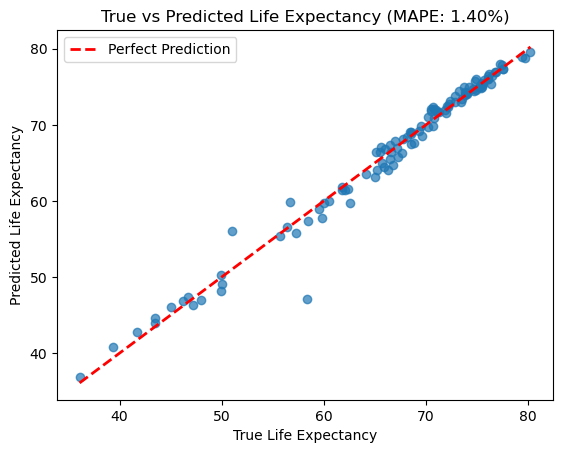

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title(f"True vs Predicted Life Expectancy (MAPE: {mape:.2f}%)")
plt.legend()
plt.show()
